In [1]:
%pylab inline
from astropy.io import fits
import astropy.units as u
import pickle as pickle
import os as os
import pandas as pd

from spectools_ir.utils import extract_hitran_data, spec_convol, make_rotation_diagram, get_molmass
from spectools_ir.utils import compute_thermal_velocity, sigma_to_fwhm, fwhm_to_sigma, wn_to_k, spec_convol_R
from spectools_ir.utils import get_miri_mrs_resolution, get_miri_mrs_wavelengths, make_miri_mrs_figure

from spectools_ir.flux_calculator import calc_fluxes, make_lineshape

from spectools_ir.slabspec import make_spec

from spectools_ir.slab_fitter import Config, LineData,Retrieval
from spectools_ir.slab_fitter import corner_plot, trace_plot, find_best_fit, compute_model_fluxes
from spectools_ir.slab_fitter import calc_solid_angle, calc_radius
from spectools_ir.slab_fitter import read_data_from_file, get_samples

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import spectools_ir
print(spectools_ir.__file__)

/Users/belaarwen/opt/anaconda3/lib/python3.9/site-packages/spectools_ir/__init__.py


In [3]:
#hitran_data_CO  = extract_hitran_data('CO',4.6,5.42,vup=1)                
hitran_data_H2O = extract_hitran_data('H2O',4.6,5.42,eupmax=4000,aupmin=0)

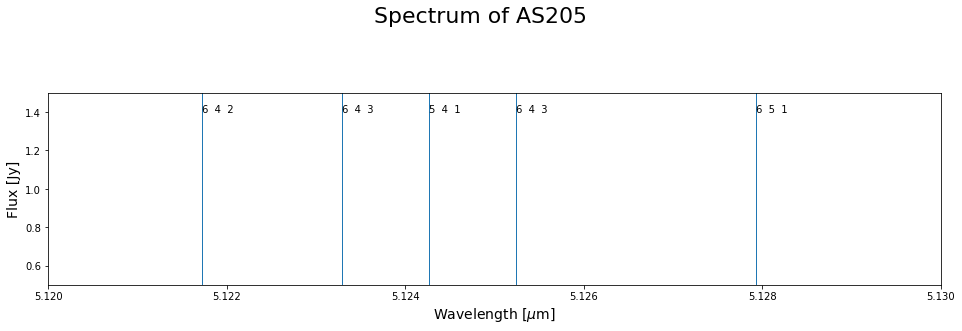

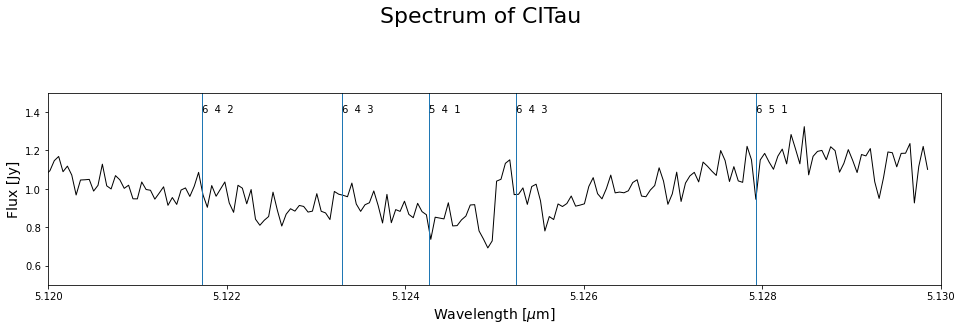

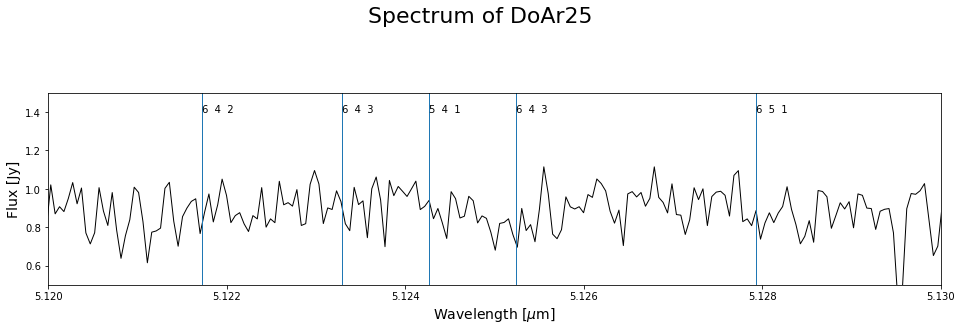

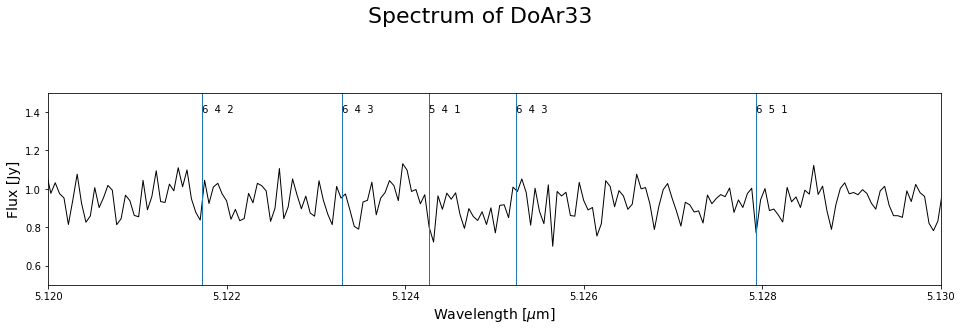

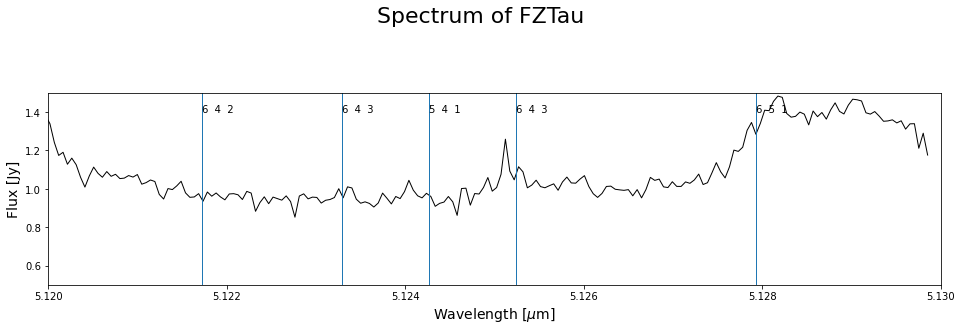

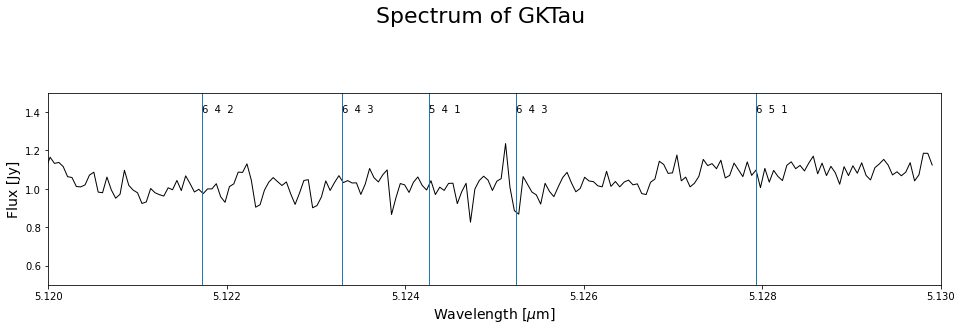

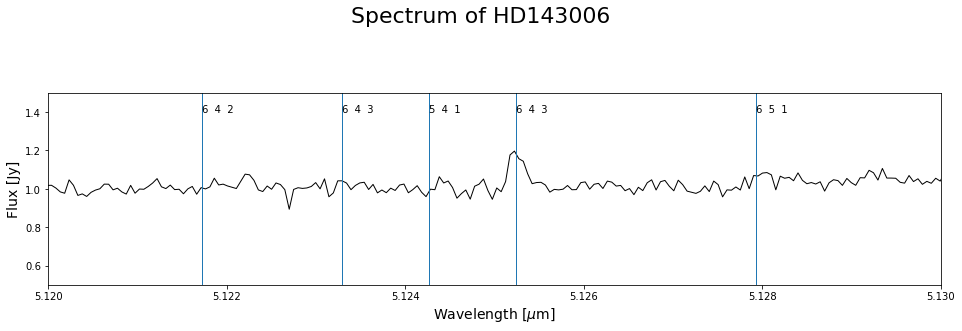

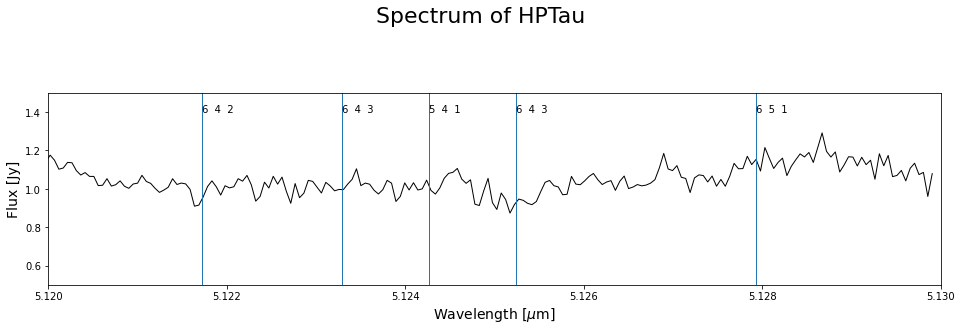

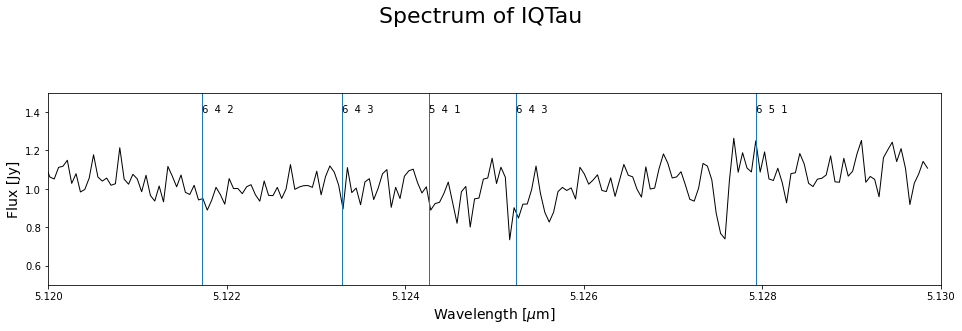

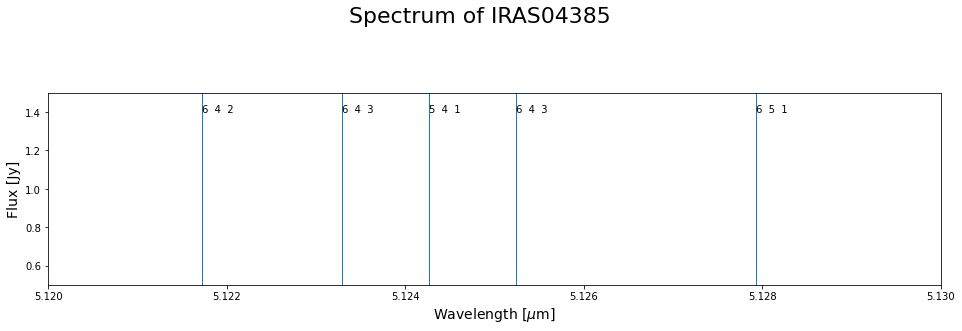

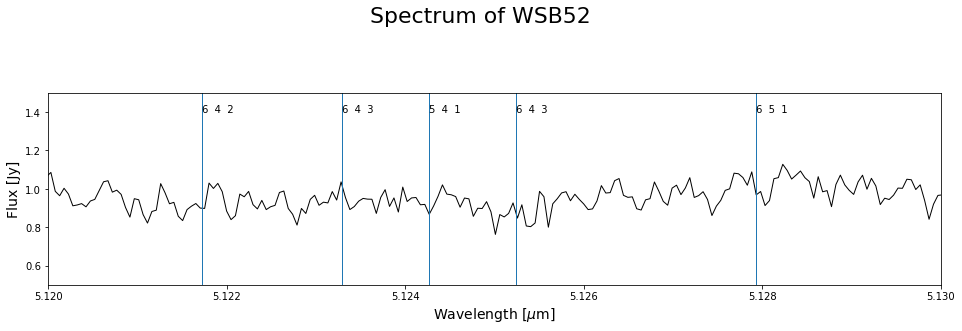

In [6]:
sources_list = ['AS205','CITau','DoAr25','DoAr33','FZTau','GKTau','HD143006','HPTau','IQTau','IRAS04385','WSB52']

for i in sources_list:
    infile  = '/Users/belaarwen/Desktop/Vassar/Astronomy/Thesis/reducs22/'+i+'_orders.fits'
    hdulist = fits.open(infile)      #hdu means header data unit so we are creating a list of header data units to use in further files
    data    = hdulist[1].data
    wave    = data['wave']
    flux    = data['flux']
    
    fig = plt.figure(figsize = (16,12))
    fig.suptitle('Spectrum of ' +i, fontsize = 22)

    doppler_shift = 0.00029073304690986737
    
    ax1 = fig.add_subplot(311)
    ax1.plot(wave+doppler_shift,flux, linewidth=1, color='k')
    ax1.set_xlim(5.12, 5.13)
    #for i,lam in enumerate(hitran_data_CO['wave']):
    #    if((lam>5.12) & (lam<5.13)):
    #        ax1.axvline(lam, linewidth=1, color='tab:red') 
    for i,lam in enumerate(hitran_data_H2O['wave']):
        if((lam>5.12) & (lam<5.13)):
            ax1.axvline(lam, linewidth=1, color='tab:blue') 
            ax1.text(hitran_data_H2O['wave'][i],1.4,hitran_data_H2O['Qp'][i].strip())
    ax1.set_xlabel('Wavelength [$\mu$m]', fontsize=14)
    ax1.set_ylabel('Flux [Jy]', fontsize=14)
    ax1.set_ylim(0.5, 1.5)

There seems to be a feature in CITau, FKTau, HD143006 and possibly one in GKTau. 

DoAr25, DoAr33, HPTAU, IQTau and WSB52 have no discernable feature.

IRAS04385 and AS205 have no spectrum in this regime.